# Técnicas de Simulación: 1er Parcial

#### Texto y código por Carlos Santillán

## Generadores de números Aleatorios (Pseudoaleatorios) 

In [ ]:
import numpy as np                  # Vectores
import pandas as pd                 # DataFrames
import matplotlib.pyplot as plt     # Gráficas
import math                         # Operaciones

%matplotlib inline                  

**Requisitos deseables para un generador**

1. Producir muestras según dist. $U(0,1)$

2. Pasar los contrastes de aleatoriedad e independencia más habituales

3. Que la sucesión generada sea reproducible a partir de la semilla

4. Tener una longitud de ciclo tan grande como se deseé

5. Generar valores a alta velocidad

6. Ocupar poca memoria


$X_{i+1} = F(X_{0}, X_{1}, ..., X_{i})$

$u_{i+1} = f(X_{i})$

Donde $F:Z \rightarrow Z$ y $f:Z \rightarrow (0,1)$

**Métodos para generar números pseudoaleatorios**

- Método de los cuadrados medios (von Neuman)
- Método de Lehmer
- Métodos congruenciales
	- Mixto o de Mersene
	- Lineal Múltiple
	- No lineales
	- Matriciales


Los Métodos COngruenciales se basan en la *relación de recurrencia*:

$X_{i+1} = F(X_{0}, X_{1}, ..., X_{i})$ $mod M$

$u_{i+1} = f(X_{i})$

Donde $F:Z \rightarrow Z$ y $f:Z \rightarrow (0,1)$

Ejemplo:

- Generador Congruencial Lineal

$X_{i+1} = (aX + b)$  $mod M$

$u_{i+1} = \frac{X_{i+1}}{M}$ 

### LA SECUENCIA ALEAT. SERÁ A LO MÁS DEL TAMAÑO DEL MOD n

Ejemplo:

a) a = 5, b = 4, M = 8; semilla $X_{0} = 1$

b) a = 5, b = 5, M = 8

In [ ]:
### CONSTRUIR FUNCIÓN

def generador_congruencial_lineal():
    X0 = float(input("Dame la semilla (X0):"))
    a = float(input("Dame a:"))
    b = float(input("Dame b:"))
    M = float(input("Dame el modulo (M):"))
    n = float(input("Dame el número de simulaciones (n):"))
    print("El generador es: X(i+1) = (" + str(a) + "X " + str(b) + " mod " + str(M))
    X = np.zeros(n)
    u = np.zeros(n)
    X[0] = X0
    for i in range(0, n-1):
        X[i+1] = np.mod(a * X[i] + b, M)
        u[i+1] = X[i+1] / M
    print("El vector X es: " + str(X))
    print("El vector u es: " + str(u))
    
    ### Resultados de 7 = 5X + 5 mod 8:
    ### El vector X es: [7. 0. 5. 6. 3. 4. 1. 2.]
    ### El vector u es: [0.    0.    0.625 0.75  0.375 0.5   0.125 0.25 ]


#X = np.zeros(n)     ### inicializamos nuestro vector de X
#u = np.zeros(n)     ### inicializamos nuestro vector de u  
#X[0] = X0           ### Fijamos nuestra semilla

### Inciso a)
### X_{i+1} = (aX + b) mod M
### u_{i+1} = X_{i+1}/M


#M = 8               ### longitud de nuestro vector = modulo buscado
#a = 5
#b = 5

#X = np.zeros(M)     ### inicializamos nuestro vector de X
#u = np.zeros(M)     ### inicializamos nuestro vector de u  
#X[0] = 7            ### Fijamos nuestra semilla

### Con este ciclo llenamos los vectores
### Es más conveniente hacerlo con "While" para saber cuando truena
#for i in range(0, M-1):
 #   X[i+1] = np.mod(a * X[i] + b, M)
 #   u[i+1] = X[i+1] / M
    
#print("El vector X es: " + str(X))
#print("El vector u es: " + str(u))

El vector X es: [7. 0. 5. 6. 3. 4. 1. 2.]
El vector u es: [0.    0.    0.625 0.75  0.375 0.5   0.125 0.25 ]


### Generadores de Ciclo Máximo

- Es muy importante el **Teorema de Knuth**: Las sig. cond. son necesarias y suf. para que un generador congruencial con param. *a, b* y *m* tenga periodo máximo (i.e. *p = m*)

	1. *b* y *m* con primos entre sí (i.e. *mcd(b, m)* = 1)
	
	2. *a - 1* es múltiplo de todos los factores primos de *m* (i.e. *a* congruente *1 mod g*, para todo *g* factor primo de *m*)

	3. Si *m* es múltiplo de 4, entonces *a - 1* también lo ha de ser (i.e. *m* congruente *0 mod 4* implica que *a* congruente *1 mod 4*)

- Nótese que *m* no puede ser primo, ya que no cumpliría con el punto e del *Teorema de Knuth* 

- También es importante el Teorema de Marsaglia

*Ejemplo:*

a) $X_{0}$ = 7, *a* = 1093, *b* = 18257, *M* = 86436

Comprobar si es un buen generador

El vector X es: [7.0000e+00 2.5908e+04 7.1129e+04 5.6290e+04 7.9500e+02 2.2832e+04
 8.0065e+04 5.6070e+04 1.9643e+04 5.1928e+04]
El vector u es: [0.         0.29973622 0.82290944 0.65123328 0.00919756 0.2641492
 0.92629229 0.64868805 0.22725485 0.6007682 ]
Los múmeros b y M SON PRIMOS ENTRE SÍ


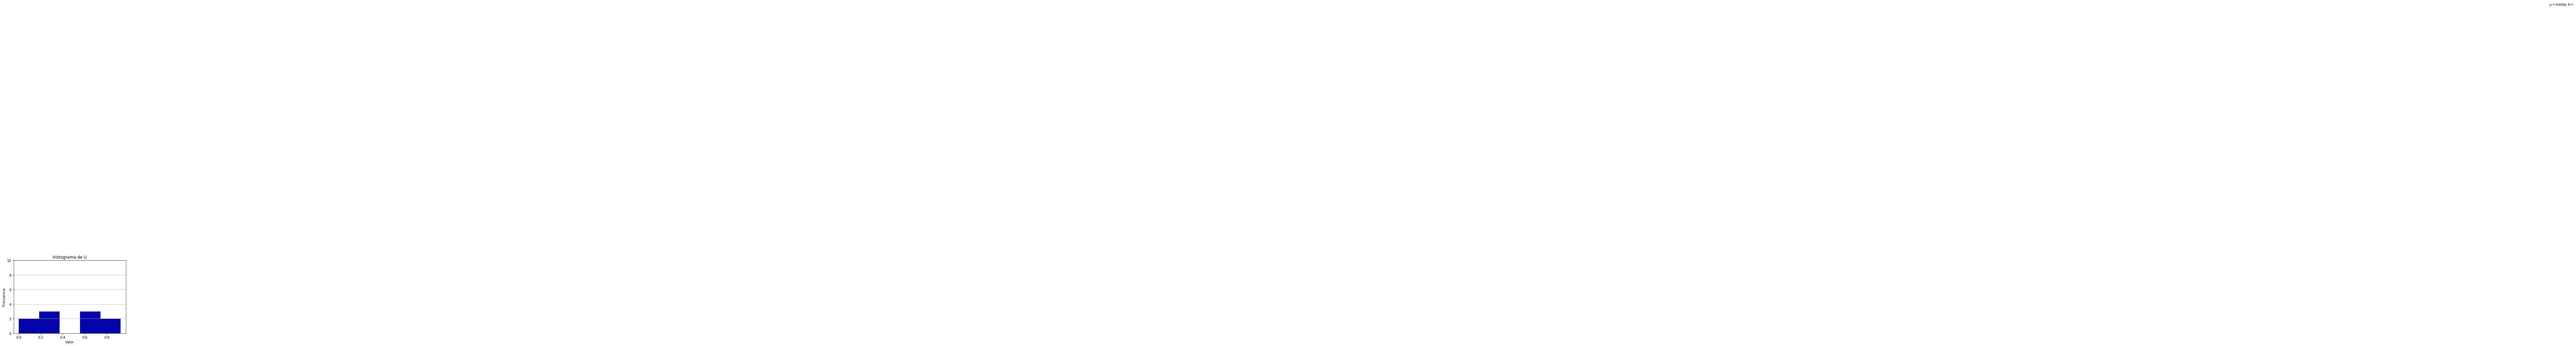

In [22]:
### Parámetros del generador
X0 = 7
a = 1093
b = 18257
M = 86436
n = 10              ### limitamos el número de simulaciones

X = np.zeros(n)     ### inicializamos nuestro vector de X
u = np.zeros(n)     ### inicializamos nuestro vector de u  
X[0] = X0           ### Fijamos nuestra semilla

### CONSTRUIR FUNCIÓN
### Con este ciclo llenamos los vectores 
### Es más conveniente hacerlo con "While" para saber cuando truena
for i in range(0, n-1):
    X[i+1] = np.mod(a * X[i] + b, M)
    u[i+1] = X[i+1] / M

print("El vector X es: " + str(X))
print("El vector u es: " + str(u))

### Parte gráfica
### En R: par(mfrow = c(1,2), pty = "s")
###       hist(u, freq = F, nclass = 10, col = "red")
###       abline(h = 1, lty = 2, col = "blue")

# Interfaz para matplotlib.axes.Axes.hist() 
m, bins, patches = plt.hist(x=u, bins='auto', color='#0504aa')#, alpha=0.7, rwidth=0.85)

plt.grid(axis='y')#, alpha=0.75)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de U')
plt.text(23, 45, r'$\mu=media, b=$')
maxfreq = m.max()
# Fijamos un límite superior limpio para el eje y.
plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


### CONSTRUIR FUNCIÓN
### Verificamos puntos del Teorema de Knuth
punto1 = math.gcd(b, M)         ### Obtenemos el Máximo Común Divisor 
if punto1 == 1:
    print("Los múmeros b y M SON PRIMOS ENTRE SÍ")
else:
    print("NO SON PRIMOS ENTRE SÍ")




Qué onda con las gráficas?!

Teorema de Glivenko-Cantelli